## Setup

In [ ]:
#import
import numpy as np
import pandas as pd


from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
#load the pickle files
train_features = pd.read_pickle("C:\data\train_features.pkl")
test_features = pd.read_pickle("C:\data\test_features.pkl")

## Categorical encoding

In [ ]:
#categorial cols
categorical = ['Driver', 'Compound']

#encode training and testing data for categorial
train_encoded = pd.get_dummies(train_features, columns=['Driver', 'Compound'], drop_first=True)
test_encoded = pd.get_dummies(test_features, columns=['Driver', 'Compound'], drop_first=True)

#look for stuff missing in training thats is not in testing vice versa
missing = set(train_encoded.columns) - set(test_encoded.columns)
#add missing cols with values of 0 in the test set
for col in missing:
    test_encoded[col] = 0
#line up the training and test columns the same
test_encoded = test_encoded[train_encoded.columns]
#shape
print("Encoded training set shape:", train_encoded.shape)
print("Encoded test set shape:", test_encoded.shape)


Encoded training set shape: (2913, 33)
Encoded test set shape: (921, 33)


## Random Forest Regressor

In [ ]:
#create train/test to prepare to train a random forest regressor
X_train = train_encoded.drop("LapTimeSeconds", axis=1)
y_train = train_encoded["LapTimeSeconds"]

X_test = test_encoded.drop("LapTimeSeconds", axis=1)
y_test = test_encoded["LapTimeSeconds"]

In [ ]:
#run a ranodm forest with 500 decision trees that are 8 levels deep
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=8,          
    random_state=42,
    n_jobs=-1              
)
#fit the data
rf_model.fit(X_train, y_train)

#predict
predictions = rf_model.predict(X_test)

## Gradient Boosting

In [ ]:
#create train/test to prepare to train a gradient boosting regressor
X_train = train_encoded.drop("LapTimeSeconds", axis=1)
y_train = train_encoded["LapTimeSeconds"]

X_test = test_encoded.drop("LapTimeSeconds", axis=1)
y_test = test_encoded["LapTimeSeconds"]

In [ ]:
#run a graident boosting regressor with 300 trees in sequence, with most depth of 3 splits wth conitrubtion scaled by 0.05
gbr_model = GradientBoostingRegressor(
    n_estimators=300,      
    max_depth=3,           
    learning_rate=0.05,    
    random_state=42
)

#fit the data
gbr_model.fit(X_train, y_train)

#predict
gbr_preds = gbr_model.predict(X_test)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error

In [ ]:
#perfomance metrics
def evaluate_model(y_true, y_pred, model_name="Model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    median_ae = median_absolute_error(y_true, y_pred)
    mape = (abs((y_true - y_pred) / y_true).mean()) * 100  # custom calculation

    print(f"\n{model_name} Performance Metrics\n")

    print(f"MAE: {mae:.3f} sec")
    print(f"RMSE: {rmse:.3f} sec")
    print(f"R²: {r2:.4f}")
    print(f"Median Absolute Error: {median_ae:.3f} sec")
    print(f"Mean Absolute Percentage Error : {mape:.2f}%")

In [ ]:
#Random Forest metrics
evaluate_model(y_test, predictions, model_name="Random Forest Regressor")


Random Forest Regressor Performance Metrics

MAE (Mean Absolute Error)             : 1.012 sec
RMSE (Root Mean Squared Error)         : 1.229 sec
R² (Coefficient of Determination)     : -0.7168
Median Absolute Error                  : 0.867 sec
MAPE (Mean Absolute Percentage Error) : 1.13%


In [ ]:
#graident boosting metrics
evaluate_model(y_test, gbr_preds, model_name="Gradient Boosting Regressor")


Gradient Boosting Regressor Performance Metrics

MAE (Mean Absolute Error)             : 1.017 sec
RMSE (Root Mean Squared Error)         : 1.210 sec
R² (Coefficient of Determination)     : -0.6656
Median Absolute Error                  : 0.925 sec
MAPE (Mean Absolute Percentage Error) : 1.14%


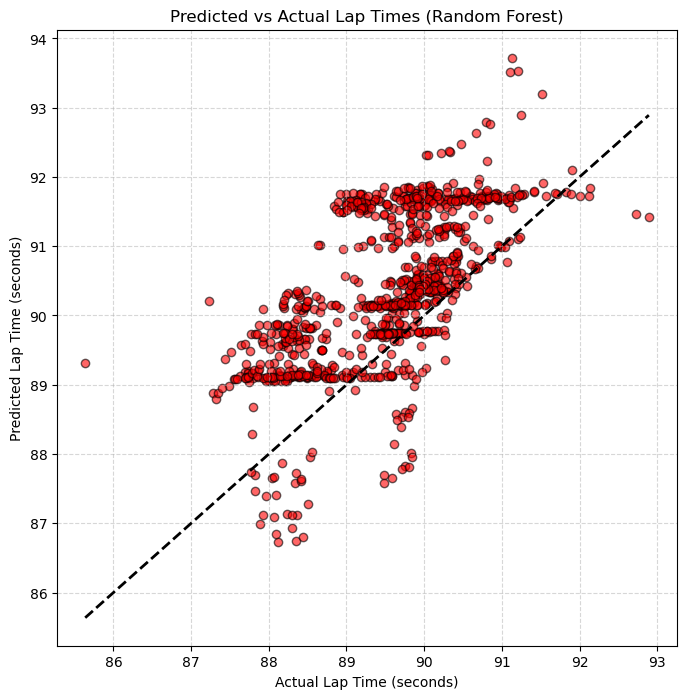

In [ ]:
#plot the predicted vs acutal lap times for rf
plt.figure(figsize=(8,8))
plt.scatter(y_test, predictions, alpha=0.6, color='red', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title("Predicted vs Actual Lap Times (Random Forest)")
plt.xlabel("Actual Lap Time (secs)")
plt.ylabel("Predicted Lap Time (secs)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


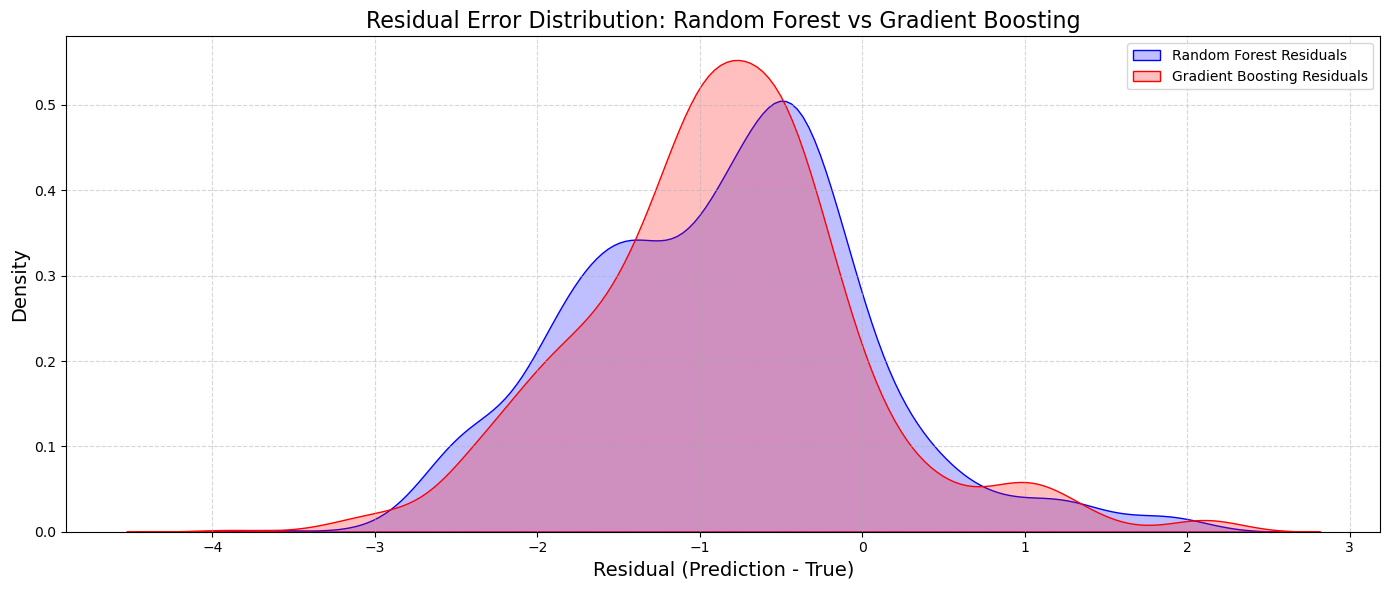

In [ ]:
import seaborn as sns
#find the residual difference between rf and gb and plot it
rf_residuals = y_test - predictions
gbr_residuals = y_test - gbr_preds

plt.figure(figsize=(14,6))
sns.kdeplot(rf_residuals, label='Random Forest Residuals', fill=True, color='blue')
sns.kdeplot(gbr_residuals, label='Gradient Boosting Residuals', fill=True, color='red')

plt.title("Residual Error Distribution: Random Forest vs Gradient Boosting", fontsize=16)
plt.xlabel("Residual", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Model.pkl

In [ ]:
import pickle
#save rf model to pickle file
with open("/models/rf_model.pkl", 'wb') as file:
    pickle.dump(rf_model, file)

In [ ]:
#save gb model to pickle file
with open("C:/models/gbr_model.pkl", 'wb') as file:
    pickle.dump(gbr_model, file)